# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', 25)

In [4]:
import sys
# sys.path.append(r'D:\Usuarios\Kitty\Documentos\1-Master\TFM')
sys.path.append(r'D:\Programas\GitHub\TFM')

# Load Data

In [5]:
df = pd.read_csv("data/Credit_Card.csv").drop(columns=["Id"])

In [6]:
df

,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,20000.0,Female,University,Married,24,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,NaN,NaN,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43,Paid Duly,Paid Duly,Paid Duly,Paid Duly,No Consumption,No Consumption,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37,Delay 4 Months,Delay 3 Months,Delay 2 Months,Paid Duly,No Consumption,No Consumption,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41,Delay 1 Month,Paid Duly,No Consumption,No Consumption,No Consumption,Paid Duly,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Parameters

In [7]:
target = "Default"

# Eliminamos categorías outliers

In [8]:
# # Identificar columnas categóricas automáticamente
# categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# # Iterar sobre cada columna categórica
# for col in categorical_columns:
#     # Calcular la frecuencia relativa de cada categoría
#     frecuencia_relativa = df[col].value_counts(normalize=True)
    
#     # Identificar las categorías que representan menos del 1%
#     categorias_validas = frecuencia_relativa[frecuencia_relativa >= 0.01].index
    
#     # Filtrar el DataFrame para conservar solo las categorías válidas
#     df = df[df[col].isin(categorias_validas)]

# # Mostrar el DataFrame resultante
# print("Dataset después de eliminar registros con categorías raras (<1%) en todas las columnas categóricas:")
# print(df)


# Rellenamos NaN con la moda

In [9]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Rellenar los NaN de las columnas categóricas con la moda
for col in categorical_columns:
    moda = df[col].mode()[0]  # Obtenemos la moda (primer valor si hay múltiples)
    df[col].fillna(moda, inplace=True)

# Mostrar el DataFrame resultante
print("Dataset después de rellenar los NaN con la moda:")
df


Dataset después de rellenar los NaN con la moda:


C:\Users\mario\AppData\Local\Temp\ipykernel_19712\2455475951.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(moda, inplace=True)


,CreditLimit,Gender,EducationLevel,Marriage,Age,RepaymentStatusSep,RepaymentStatusAug,RepaymentStatusJul,RepaymentStatusJun,RepaymentStatusMay,RepaymentStatusApr,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default
0,20000.0,Female,University,Married,24,Delay 2 Months,Delay 2 Months,Paid Duly,Paid Duly,No Consumption,No Consumption,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,Female,University,Single,26,Paid Duly,Delay 2 Months,No Consumption,No Consumption,No Consumption,Delay 2 Months,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,Female,University,Single,34,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,Female,University,Married,37,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,Male,University,Married,57,Paid Duly,No Consumption,Paid Duly,No Consumption,No Consumption,No Consumption,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,Male,High School,Married,39,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,No Consumption,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,Male,High School,Single,43,Paid Duly,Paid Duly,Paid Duly,Paid Duly,No Consumption,No Consumption,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,Male,University,Single,37,Delay 4 Months,Delay 3 Months,Delay 2 Months,Paid Duly,No Consumption,No Consumption,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,Male,High School,Married,41,Delay 1 Month,Paid Duly,No Consumption,No Consumption,No Consumption,Paid Duly,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# One-Hot Encoder

In [10]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Realizar One-Hot Encoding para todas las columnas categóricas
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

# Mostrar el DataFrame resultante
print("Dataset después del One-Hot Encoding:")
df_encoded

Dataset después del One-Hot Encoding:


,CreditLimit,Age,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,...,RepaymentStatusMay_Delay 8 Months,RepaymentStatusMay_No Consumption,RepaymentStatusMay_Paid Duly,RepaymentStatusApr_Delay 2 Months,RepaymentStatusApr_Delay 3 Months,RepaymentStatusApr_Delay 4 Months,RepaymentStatusApr_Delay 5 Months,RepaymentStatusApr_Delay 6 Months,RepaymentStatusApr_Delay 7 Months,RepaymentStatusApr_Delay 8 Months,RepaymentStatusApr_No Consumption,RepaymentStatusApr_Paid Duly
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,...,False,True,False,False,False,False,False,False,False,False,True,False
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,...,False,True,False,True,False,False,False,False,False,False,False,False
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,...,False,True,False,False,False,False,False,False,False,False,True,False
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,...,False,True,False,False,False,False,False,False,False,False,True,False
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,...,False,True,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,...,False,True,False,False,False,False,False,False,False,False,True,False
29996,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,...,False,True,False,False,False,False,False,False,False,False,True,False
29997,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,...,False,True,False,False,False,False,False,False,False,False,True,False
29998,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,...,False,True,False,False,False,False,False,False,False,False,False,True


In [11]:
vars_numericas = df_encoded.select_dtypes(include=['float', 'int']).columns

# Scale

In [12]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# 1. Cargar el dataset
X = df_encoded[[elem for elem in df_encoded.columns if elem != target]]
y = pd.Series(df_encoded[target], name=target)

# 2. Escalar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[-1])
print("\n",X.shape)

[0.04040404 0.43103448 0.1889308  0.11263272 0.11366715 0.19455324
 0.11280261 0.27274648 0.00237879 0.00106872 0.00159591 0.00161031
 0.00234451 0.00189155 0.         1.         0.         0.
 0.         0.         1.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.        ]

 (30000, 84)


# SMOTE

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Revisar la proporción inicial de clases
print("Distribución original de y_train:")
print(y_train.value_counts())

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para generar un conjunto balanceado
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Revisar la nueva distribución de clases
print("\nDistribución después de SMOTE:")
print(y_train_smote.value_counts())

Distribución original de y_train:
Default
0    18691
1     5309
Name: count, dtype: int64

Distribución después de SMOTE:
Default
0    18691
1    18691
Name: count, dtype: int64


# TRAIN

In [ ]:
# 3. Configurar validación cruzada k-fold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 4. Inicializar modelos
models = {
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# 5. Configurar los hiperparámetros para cada modelo
param_grids = {
    "Regresión Logística": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"],
        "penalty": ["l2"]
    },
    "Árbol de Decisión": {
        "criterion": ["gini", "entropy"],
        "max_depth": [3, 5],
        "min_samples_split": [50, 500]
    },
    "Naive Bayes": {
        "var_smoothing": np.logspace(0, -9, num=5)
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "metric": ["euclidean", "manhattan"]
    },
    "Random Forest": {
        "n_estimators": [50, 100],
        "max_depth": [3, 5],
        "min_samples_split": [50, 500]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100],
        "learning_rate": [0.01, 0.1],
        "max_depth": [3, 5]
    }
}

# 6. Diccionario para almacenar los mejores modelos y resultados
best_models = {}
grid_results = []

# 7. Iterar sobre cada modelo y realizar GridSearchCV
for model_name, model in models.items():
    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grids[model_name],
        cv=kfold,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid.best_estimator_
    grid_results.append({
        "Model": model_name,
        "Best Params": grid.best_params_,
        "Best Accuracy": grid.best_score_
    })

# Convertir resultados de hiperparámetros en un DataFrame
grid_results_df = pd.DataFrame(grid_results)
grid_results_df.sort_values(by="Best Accuracy", ascending=False, inplace=True)

# 8. Evaluar los mejores modelos con k-fold
evaluation_summary = []

for model_name, best_model in best_models.items():
    accuracy = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="accuracy").mean()
    precision = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="precision_weighted").mean()
    recall = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="recall_weighted").mean()
    f1 = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="f1_weighted").mean()
    roc_auc = cross_val_score(best_model, X_train_smote, y_train_smote, cv=kfold, scoring="roc_auc").mean()
    
    evaluation_summary.append({
        "Model": model_name,
        "Mean Accuracy": accuracy,
        "Mean Precision": precision,
        "Mean Recall": recall,
        "Mean F1-Score": f1,
        "Mean ROC - AUC": roc_auc
    })

# Convertir resultados de evaluación en un DataFrame
evaluation_df = pd.DataFrame(evaluation_summary)
evaluation_df.sort_values(by="Mean Accuracy", ascending=False, inplace=True)

# 9. Mostrar resultados finales
print("Resultados de búsqueda de hiperparámetros:")
print(grid_results_df)

print("\nDesempeño de los modelos optimizados:")
print(evaluation_df)

Resultados de búsqueda de hiperparámetros:
                 Model                                        Best Params  \
5    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
3  K-Nearest Neighbors  {'metric': 'manhattan', 'n_neighbors': 3, 'wei...   
1    Árbol de Decisión  {'criterion': 'entropy', 'max_depth': 10, 'min...   
4        Random Forest  {'max_depth': 5, 'min_samples_split': 50, 'n_e...   
0  Regresión Logística  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}   
2          Naive Bayes                             {'var_smoothing': 1.0}   

   Best Accuracy  
5       0.831229  
3       0.821358  
1       0.731101  
4       0.720721  
0       0.704162  
2       0.663501  

Desempeño de los modelos optimizados:
                 Model  Mean Accuracy  Mean Precision  Mean Recall  \
5    Gradient Boosting       0.831229        0.836038     0.831229   
3  K-Nearest Neighbors       0.821411        0.829916     0.821411   
1    Árbol de Decisión       0.7311

In [ ]:
import joblib

# Guardar los mejores modelos en archivos locales
for model_name, best_model in best_models.items():
    # Definir el nombre del archivo para cada modelo
    filename = f"{model_name.replace(' ', '_')}_best_model.joblib"
    # Guardar el modelo
    joblib.dump(best_model, filename)
    print(f"Modelo {model_name} guardado como {filename}")

# Regresión Logística

In [24]:
# Interpretar la regresión logística
import numpy as np

# Extraer el modelo de Regresión Logística
logistic_model = best_models["Regresión Logística"]

# Obtener los coeficientes y el intercepto
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Crear un DataFrame para los coeficientes
feature_names = X.columns
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Coefficient": np.abs(coefficients)
})

# Ordenar los coeficientes por relevancia
coef_df_sorted = coef_df.sort_values(by="Absolute Coefficient", ascending=False)

# Generar la ecuación de la regresión logística
equation = " + ".join(
    [f"{coef:.4f}*{feature}" for coef, feature in zip(coefficients, feature_names)]
)
equation = f"logit(p) = {intercept:.4f} + {equation}"

# Mostrar la ecuación
print("Ecuación de la Regresión Logística:")
print(equation)

# Mostrar los coeficientes ordenados
print("\nCoeficientes de la Regresión Logística ordenados por relevancia:")
print(coef_df_sorted.head(20))


Ecuación de la Regresión Logística:
logit(p) = 0.1509 + -2.1105*CreditLimit + 0.1344*Age + -1.7845*BillAmountSep + 3.3228*BillAmountAug + 1.0066*BillAmountJul + 1.1137*BillAmountJun + -0.9316*BillAmountMay + -1.9987*BillAmountApr + -11.0691*PreviousPaymentSep + -9.8965*PreviousPaymentAug + -3.6731*PreviousPaymentJul + -1.7658*PreviousPaymentJun + -1.0474*PreviousPaymentMay + -1.5643*PreviousPaymentApr + 0.0016*Gender_Female + 0.1493*Gender_Male + -2.3799*EducationLevel_0 + 1.0295*EducationLevel_Graduate School + 0.8768*EducationLevel_High School + -0.1736*EducationLevel_Others + 1.0127*EducationLevel_University + -0.2145*EducationLevel_Unknown + 0.5424*Marriage_Married + 0.3880*Marriage_Others + 0.3737*Marriage_Single + -1.1532*Marriage_Unknown + -0.1817*RepaymentStatusSep_Delay 1 Month + 1.0604*RepaymentStatusSep_Delay 2 Months + 0.9850*RepaymentStatusSep_Delay 3 Months + 0.2679*RepaymentStatusSep_Delay 4 Months + 0.3393*RepaymentStatusSep_Delay 5 Months + -0.4785*RepaymentStatusSep_D

# Árbol de Decisión

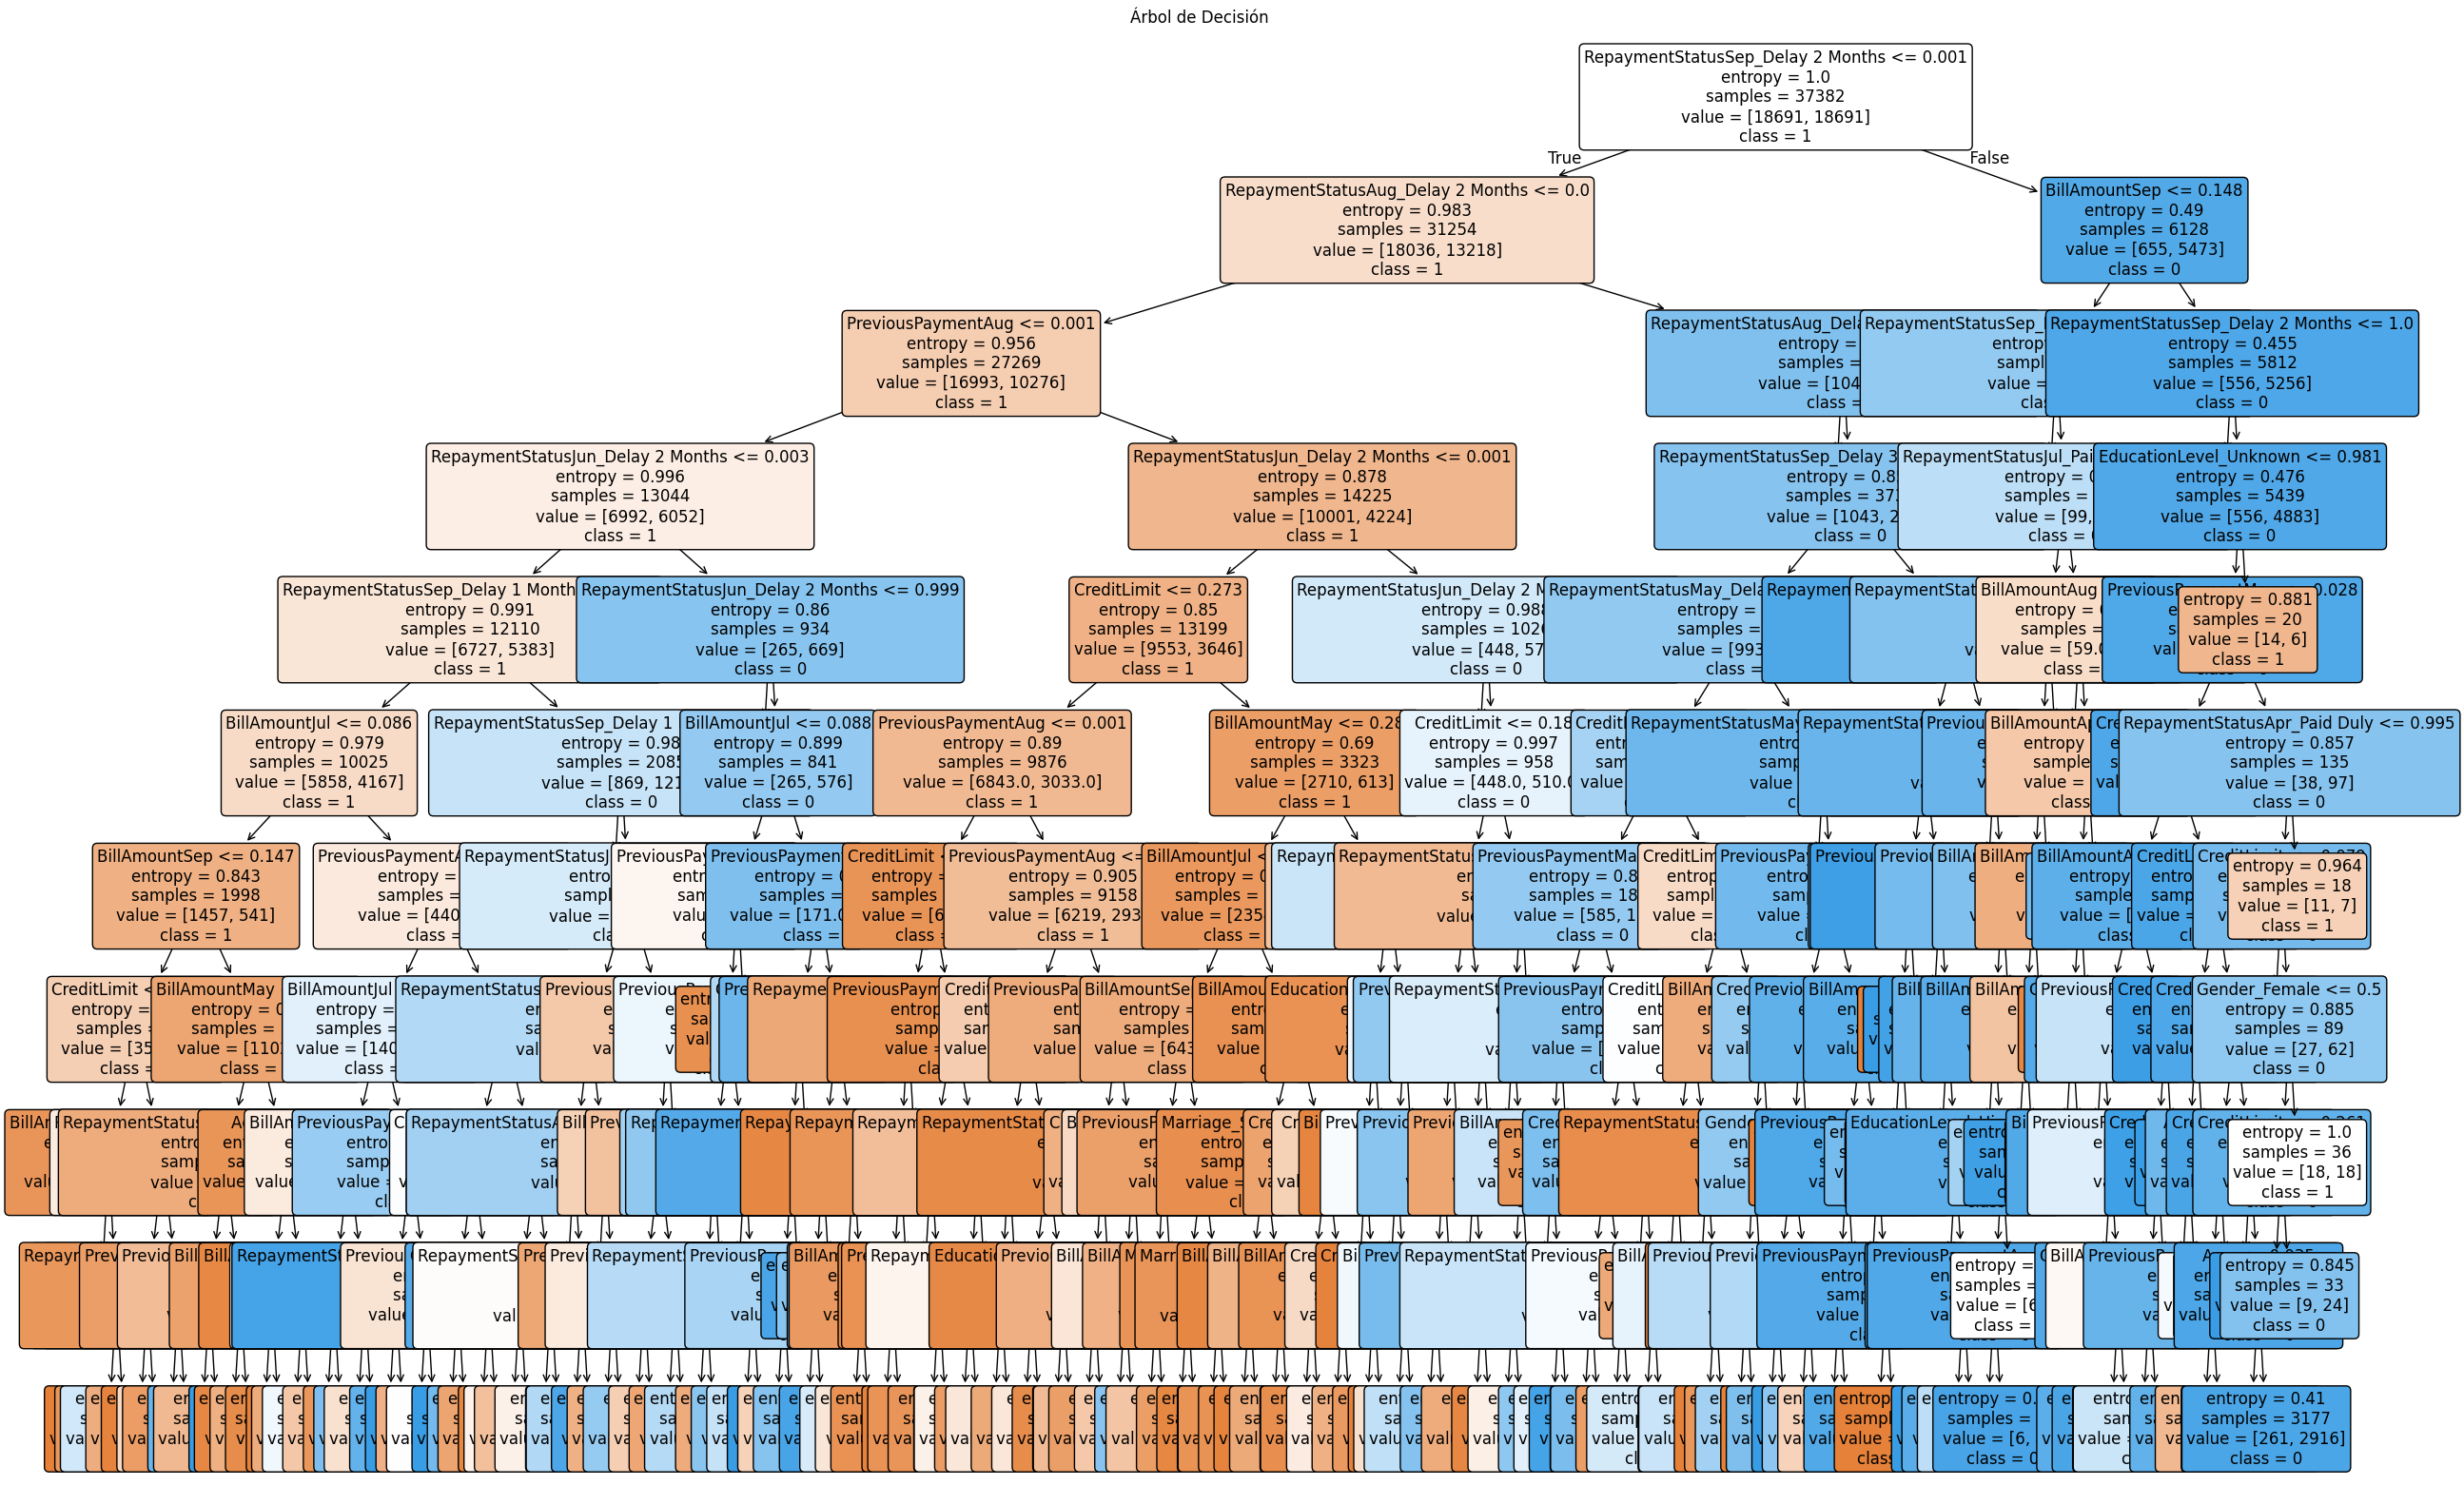

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Árbol de Decisión
decision_tree_model = best_models["Árbol de Decisión"]

# Crear la gráfica
plt.figure(figsize=(30, 20))
plot_tree(
    decision_tree_model,
    feature_names=X.columns,  # Nombres de las características (si es un DataFrame)
    class_names=[str(cls) for cls in y.unique()],  # Nombres de las clases
    filled=True,  # Colorear nodos según la clase predominante
    rounded=True,  # Bordes redondeados
    fontsize=12  # Tamaño de la fuente
)
plt.title("Árbol de Decisión")
plt.show()

# Naive Bayes

In [35]:
# Extraer el modelo Naive Bayes
nb_model = best_models["Naive Bayes"]

# Calcular probabilidades para el conjunto de prueba
class_probabilities = nb_model.predict_proba(X_val)
predictions = nb_model.predict(X_val)

# Crear un DataFrame con las probabilidades y las predicciones
prob_df = pd.DataFrame(class_probabilities, columns=[f"P(Class {cls})" for cls in nb_model.classes_])
prob_df["Prediction"] = predictions
prob_df["Actual"] = y_val.values

print("Probabilidades calculadas por Naive Bayes para las primeras observaciones:")
print(prob_df.head(20))


Probabilidades calculadas por Naive Bayes para las primeras observaciones:
    P(Class 0)  P(Class 1)  Prediction  Actual
0     0.823921    0.176079           0       0
1     0.855583    0.144417           0       0
2     0.911038    0.088962           0       0
3     0.943446    0.056554           0       1
4     0.924815    0.075185           0       0
5     0.490951    0.509049           1       0
6     0.914135    0.085865           0       0
7     0.916241    0.083759           0       0
8     0.859828    0.140172           0       0
9     0.914223    0.085777           0       0
10    0.496743    0.503257           1       0
11    0.921559    0.078441           0       0
12    0.920968    0.079032           0       1
13    0.923743    0.076257           0       0
14    0.941333    0.058667           0       0
15    0.008663    0.991337           1       0
16    0.932044    0.067956           0       0
17    0.739030    0.260970           0       1
18    0.929595    0.070405      

# KNN

Ejemplo seleccionado (objetivo):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.040404   0.431034   0.147882   0.090952   0.086345   0.162634   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  ...  \
0    0.08394   0.263103   0.029832         0.0    0.003875    0.003736  ...   

   Feature_75  Feature_76  Feature_77  Feature_78  Feature_79  Feature_80  \
0         0.0         0.0         0.0         0.0         0.0         0.0   

   Feature_81  Feature_82  Feature_83  Feature_84  Target  Distance  
0         0.0         0.0         1.0         0.0       0         0  

[1 rows x 86 columns]

Vecinos más cercanos:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.090909   0.310345   0.150528   0.070891   0.088848   0.164179   
1   0.020202   0.224138   0.146864   0.066220   0.086773   0.160138   
2   0.010101   0.224138   0.158851   0.074423   0.087428   0.176821   

   Feature_7  Feature_8  Feature_9  Fea

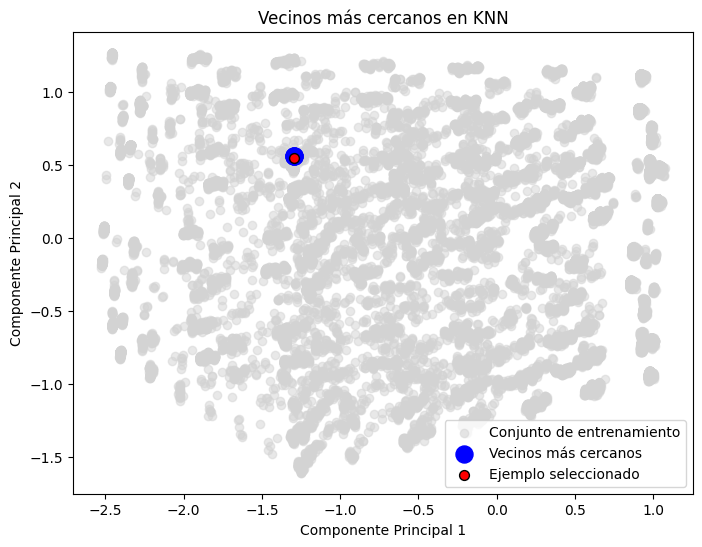

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Extraer el modelo KNN
knn_model = best_models["K-Nearest Neighbors"]

# Seleccionar una muestra del conjunto de validación (X_val como numpy array)
sample_index = 0  # Cambiar este índice para analizar diferentes ejemplos
sample = X_val[sample_index].reshape(1, -1)  # Asegurarse de que tenga forma (1, n_features)

# Obtener los vecinos más cercanos
distances, indices = knn_model.kneighbors(sample)

# Crear un DataFrame con la información de los vecinos (X_train es numpy array)
neighbors_df = pd.DataFrame(
    X_train[indices[0]],  # Recuperar las características de los vecinos
    columns=[f"Feature_{i+1}" for i in range(X_train.shape[1])]  # Crear nombres genéricos para las columnas
)
neighbors_df["Target"] = np.array(y_train)[indices[0]]  # Convertir explícitamente y_train a numpy array
neighbors_df["Distance"] = distances[0]  # Agregar las distancias

# Crear información del ejemplo seleccionado
sample_info = pd.DataFrame(sample, columns=[f"Feature_{i+1}" for i in range(sample.shape[1])])
sample_info["Target"] = np.array(y_val)[sample_index]  # Convertir y_val explícitamente a numpy array
sample_info["Distance"] = 0  # La distancia consigo mismo es 0

# Mostrar información del ejemplo y sus vecinos
print("Ejemplo seleccionado (objetivo):")
print(sample_info)

print("\nVecinos más cercanos:")
print(neighbors_df.sort_values(by="Distance"))

# Visualización (opcional) usando PCA
pca = PCA(n_components=2)

# Reducir dimensiones para graficar
X_train_pca = pca.fit_transform(X_train)  # Reducir X_train a 2D
sample_pca = pca.transform(sample)  # Reducir la muestra a 2D
neighbors_pca = pca.transform(X_train[indices[0]])  # Reducir vecinos a 2D

plt.figure(figsize=(8, 6))

# Graficar todo el conjunto de entrenamiento reducido
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c="lightgray", alpha=0.5, label="Conjunto de entrenamiento")

# Graficar los vecinos más cercanos
plt.scatter(neighbors_pca[:, 0], neighbors_pca[:, 1], c="blue", label="Vecinos más cercanos", s=150)

# Graficar la muestra objetivo
plt.scatter(sample_pca[:, 0], sample_pca[:, 1], c="red", label="Ejemplo seleccionado", s=50, edgecolor="black")  # Reducir el tamaño del punto

plt.title("Vecinos más cercanos en KNN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()


# Random Forest

Predicción: [[0.55871414 0.44128586]]
Bias (valor base): [[0.5006158 0.4993842]]


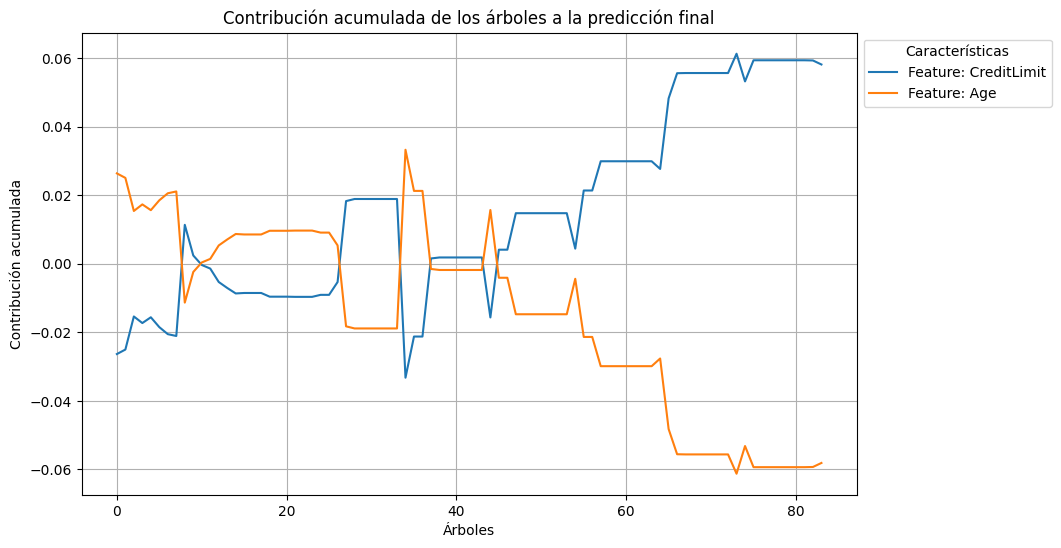

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Asumimos que ya tienes el mejor modelo de Random Forest entrenado y X_val, y_val
# best_models["Random Forest"] es tu mejor modelo entrenado y X_val es tu conjunto de validación

# Usamos los nombres de las características directamente desde X.columns
feature_names = X.columns

# Seleccionamos un ejemplo del conjunto de validación (cambia el índice si es necesario)
example_index = 0  # Puedes cambiar el índice para seleccionar un ejemplo diferente
example = X_val[example_index].reshape(1, -1)  # Asegúrate de tomar un ejemplo de tu conjunto de validación

# Explicar la predicción utilizando TreeInterpreter
prediction, bias, contributions = ti.predict(best_models["Random Forest"], example)

# Mostrar los resultados
print(f"Predicción: {prediction}")
print(f"Bias (valor base): {bias}")  # El sesgo o bias es el valor de la predicción antes de considerar los árboles

# Contribuciones de cada árbol (en cada árbol individualmente)
tree_contribs = [contrib for contrib in contributions[0]]

# Crear un gráfico de la contribución acumulada de los árboles
cumulative_contrib = np.cumsum(tree_contribs, axis=0)  # Sumar las contribuciones de cada árbol de forma acumulativa

# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la contribución acumulada de los árboles para cada característica
for i in range(cumulative_contrib.shape[1]):  # Recorrer todas las características
    plt.plot(cumulative_contrib[:, i], label=f'Feature: {feature_names[i]}')

# Etiquetas y título
plt.title("Contribución acumulada de los árboles a la predicción final")
plt.xlabel("Árboles")
plt.ylabel("Contribución acumulada")
plt.legend(title="Características", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar el gráfico
plt.show()

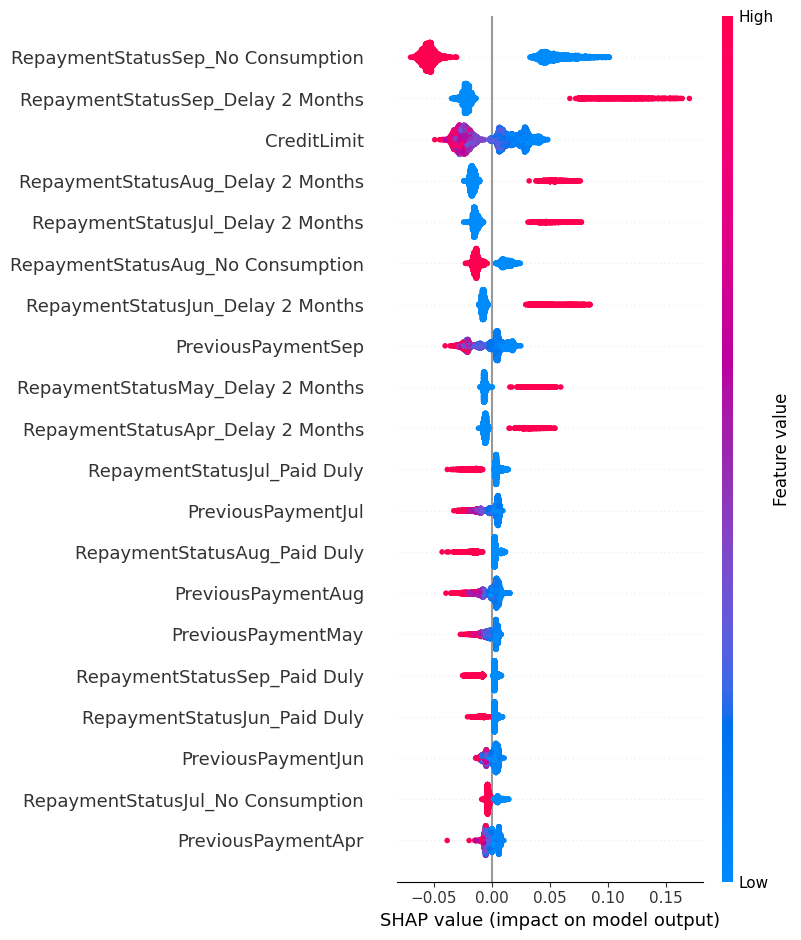

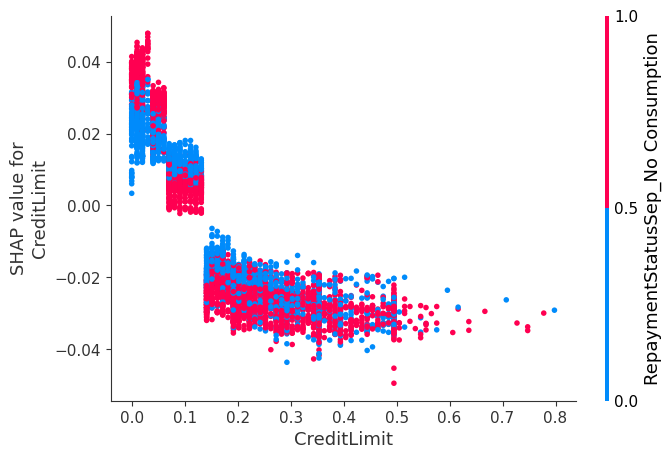

In [100]:
import shap
import matplotlib.pyplot as plt

# Asumimos que el mejor modelo de Random Forest es 'best_models["Random Forest"]'
# Y que tienes X_val, y_val como tus datos de validación

# Creamos un explicador SHAP para Random Forest
explainer = shap.TreeExplainer(best_models["Random Forest"])

# Calculamos los valores SHAP para el conjunto de validación
shap_values = explainer.shap_values(X_val)

shap_values = np.array([[col[1] for col in elem] for elem in shap_values])

# Resumen de los valores SHAP (gráfico resumen)
shap.summary_plot(shap_values, pd.DataFrame(X_val,columns=X.columns))  # 1 es para la clase positiva, ajusta si tienes más de 2 clases

# Gráfico de dispersión para un ejemplo específico
shap.initjs()  # Para inicializar visualizaciones interactivas

# Seleccionamos un ejemplo (puedes cambiar el índice)
example_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[example_index], X_val[example_index])

# Gráfico de dependencia para una característica
shap.dependence_plot("CreditLimit", shap_values, pd.DataFrame(X_val,columns=X.columns))  # Ajusta el nombre de la característica